In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

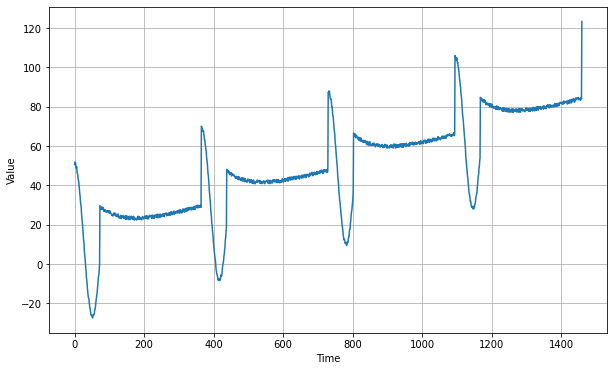

In [7]:
def plot_series(time, series, format="-", start=0, end=None):
  plt.plot(time[start:end], series[start:end], format)
  plt.xlabel("Time")
  plt.ylabel("Value")
  plt.grid(True)

def trend(time, slope=0):
  return slope * time

def seasonal_pattern(season_time):
  return np.where(season_time < 0.2, np.cos(season_time * 7 * np.pi), 1/np.exp(5 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
  season_time = ((time+phase) % period) / period
  return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
  rnd = np.random.RandomState(seed)
  return rnd.random(len(time)) * noise_level

def compute_losses(actual, predicted):
  mse = keras.metrics.mean_squared_error(actual, predicted).numpy()
  mae = keras.metrics.mean_absolute_error(actual, predicted).numpy()
  return (mse, mae)

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 2

series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude) + noise(time, noise_level, seed=31)

plt.figure(figsize=(10,6))
plot_series(time, series)
plt.show()

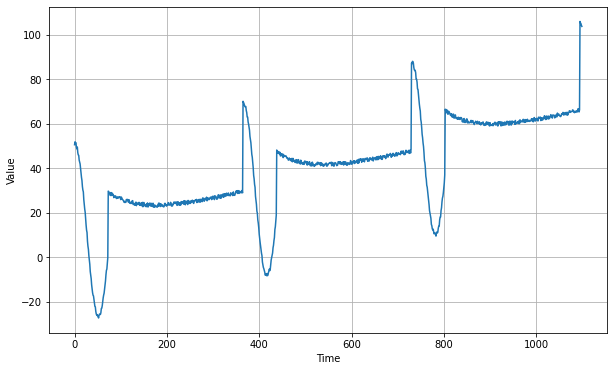

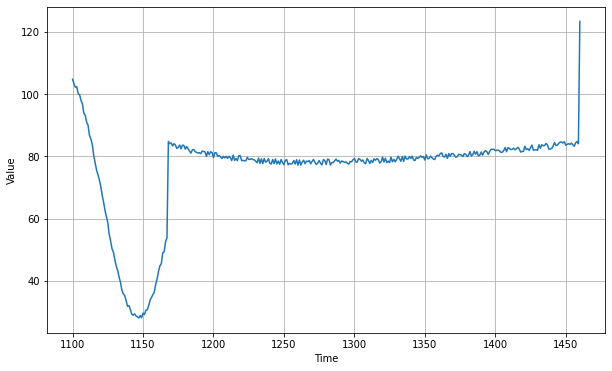

In [8]:
split_time = 1100

time_train = time[:split_time]
x_train = series[:split_time]

time_valid = time[split_time:]
x_valid = series[split_time:]

plt.figure(figsize=(10,6))
plot_series(time_train, x_train)
plt.show()

plt.figure(figsize=(10,6))
plot_series(time_valid, x_valid)
plt.show()

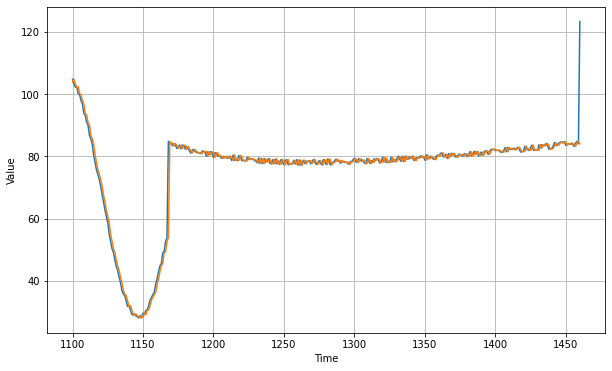

In [9]:
# Naive forecast
naive_forecast = series[split_time - 1:-1]
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, naive_forecast)

In [11]:
print(compute_losses(x_valid, naive_forecast))

(8.198490302405826, 1.0826145500532567)


In [12]:
def moving_average_forecast(series, window_size):
  forecast = []
  for time in range(len(series) - window_size):
    forecast.append(series[time:time+window_size].mean())
  return np.array(forecast)

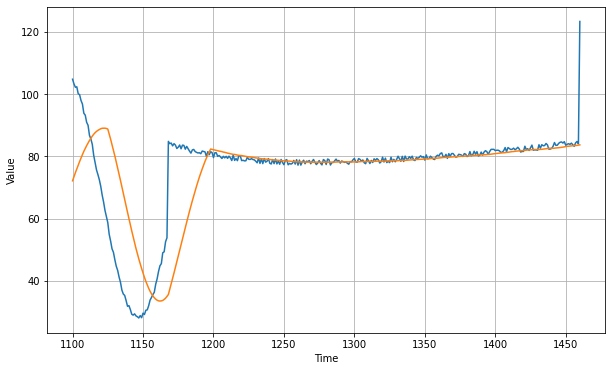

In [13]:
moving_avg = moving_average_forecast(series, 30)[split_time-30:]
plt.figure(figsize=(10,6))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg)

In [14]:
print(compute_losses(x_valid, moving_avg))

(152.74071434454936, 6.038150409929838)


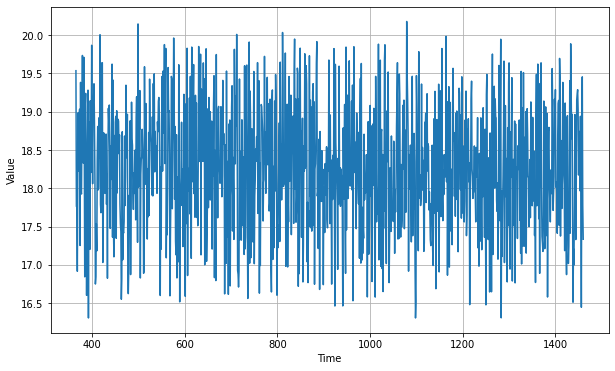

In [17]:
diff_series = series[365:] - series[:-365]
diff_time = time[365:]

plt.figure(figsize=(10,6))
plot_series(diff_time, diff_series)
plt.show()

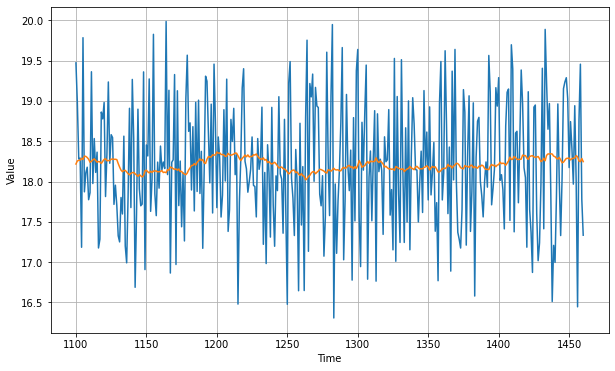

In [18]:
diff_moving_avg = moving_average_forecast(diff_series, 50)[split_time - 365 - 50:]

plt.figure(figsize=(10,6))
plot_series(time_valid, diff_series[split_time - 365:])
plot_series(time_valid, diff_moving_avg)
plt.show()

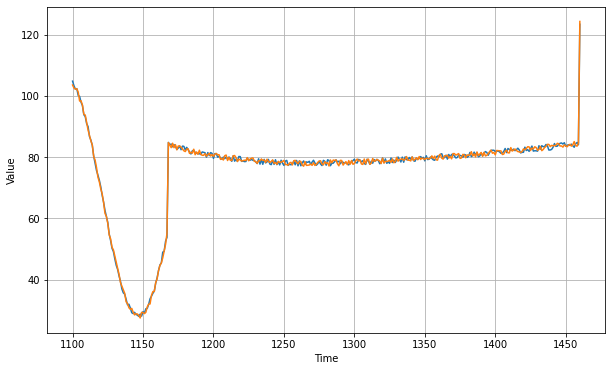

In [19]:
diff_moving_avg_plus_past = series[split_time-365:-365] + diff_moving_avg

plt.figure(figsize=(10,6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_past)
plt.show()

In [20]:
print(compute_losses(x_valid, diff_moving_avg_plus_past))

(0.6176498722879588, 0.6442847355075876)


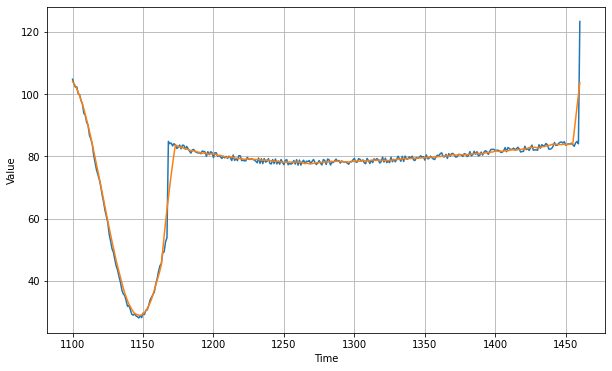

In [21]:
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time - 370:-360], 10) + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_smooth_past)
plt.show()

In [22]:
print(compute_losses(x_valid, diff_moving_avg_plus_smooth_past))

(5.059075995765261, 0.9306754351707998)
